In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer

from sklearn.metrics import root_mean_squared_error


In [2]:
def read_dataframe(path):
    df = pd.read_parquet(path)
    print("Number of columns: ", df.shape[1])
    df["duration"] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).apply(lambda x: x.total_seconds() / 60)
    return df

In [3]:
jan_path = "..//data//yellow_tripdata_2023-01.parquet"
feb_path = "..//data//yellow_tripdata_2023-02.parquet"

In [4]:
jan_df = read_dataframe(jan_path)
feb_df = read_dataframe(feb_path)

Number of columns:  19
Number of columns:  19


In [5]:
jan_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [6]:
jan_df["duration"].std()

np.float64(42.59435124195458)

<Axes: >

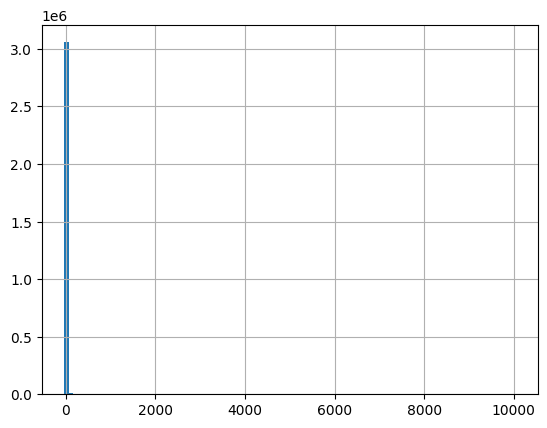

In [7]:
jan_df["duration"].hist(bins=100)

In [8]:
shape_before_filtering = jan_df.shape

In [21]:
jan_df = jan_df[(jan_df.duration >= 1) & (jan_df.duration <=60) ]
feb_df = feb_df[(feb_df.duration >= 1) & (feb_df.duration <=60) ]

In [22]:
shape_after_filtering = jan_df.shape

In [23]:
fraction = shape_after_filtering[0] / shape_before_filtering[0]
print("Fraction: ", fraction)

Fraction:  0.9812202822125979


<Axes: >

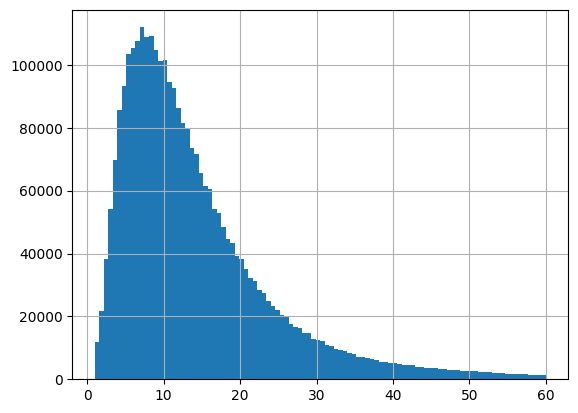

In [24]:
jan_df["duration"].hist(bins=100)

In [25]:
jan_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

In [26]:
dv = DictVectorizer()


categorical_columns = ["PULocationID", "DOLocationID"]
numerical_columns = []

train_df = jan_df[categorical_columns + numerical_columns]
train_df.loc[:,categorical_columns] = train_df.loc[:,categorical_columns].astype("str")

val_df = feb_df[categorical_columns + numerical_columns]
val_df.loc[:,categorical_columns] = val_df.loc[:,categorical_columns].astype("str")

train_dict = train_df.to_dict(orient="records")
val_dict = val_df.to_dict(orient="records")
train_array = dv.fit_transform(train_dict)
val_array = dv.transform(val_dict)


C:\Users\HP\AppData\Local\Temp\ipykernel_35976\2665675300.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['161' '43' '48' ... '114' '230' '262']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[:,categorical_columns] = train_df.loc[:,categorical_columns].astype("str")
C:\Users\HP\AppData\Local\Temp\ipykernel_35976\2665675300.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['141' '237' '238' ... '239' '79' '143']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[:,categorical_columns] = train_df.loc[:,categorical_columns].astype("str")
C:\Users\HP\AppData\Local\Temp\ipykernel_35976\2665675300.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['142' '132' '16

In [27]:
train_array.shape

(3009173, 515)

In [28]:
target = "duration"

train_target = jan_df[target].values
val_target = feb_df[target].values

In [29]:
model = LinearRegression()

model.fit(train_array, train_target)


LinearRegression()

In [30]:
predicted_train = model.predict(train_array)
predicted_val = model.predict(val_array)

In [31]:
print("train result")
root_mean_squared_error(predicted_train, train_target)

train result


7.649261822035489

In [32]:
print("val result")
root_mean_squared_error(predicted_val, val_target)

val result


7.811821332387183